## 1. <font color='red'> Mount Google Drive and Read the Data </font>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [ ]:
filepath = "/content/drive/MyDrive/Applications of LLMs to create Embeddings for Large Documents/Food App Reviews.csv"

# Load your dataset and convert the review column to list
data = pd.read_csv(filepath)

In [ ]:
# Display the data
data

,Review
0,Delivery was faster than a ninja on caffeine. ...
1,Im pretty sure they had a wall made of recycle...
2,Dude Im not even mad they were late. Food arri...
3,Chhole bhature yaar! Sunday indulgence crispy ...
4,The place had a vibe but I cant quite put my f...
...,...
96,Food arrived. I had a taste. Pretty standard.
97,Food was delivered. I ate. Cant complain.
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.
99,Ugh it was so cozy you wouldnt believe. I mean...


In [ ]:
reviews = data['Review'].tolist()
reviews

['Delivery was faster than a ninja on caffeine. Im ready to chow down!',
 'Im pretty sure they had a wall made of recycled cans. Or was it shoes?',
 'Dude Im not even mad they were late. Food arrived like a surprise party!',
 'Chhole bhature yaar! Sunday indulgence crispy bhature FTW.',
 'The place had a vibe but I cant quite put my finger on it. Hipster? Unicorn?',
 'Hakka noodles FTW! Desi-Chinese fusion for life.',
 'Pasta was alright yaar. More masala couldve made it sing.',
 'Im telling you it was like stepping into the future. Or was it the 90s?',
 'I was starving but the food came faster than I could say hangry. Good stuff.',
 'Burgers are my jam but this one was kinda meh. Needed more zing.',
 'Sushi was like a flavor adventure. Mini party in my mouth.',
 'Dude there was like this mural on the wall. It was a cat no wait a panda?',
 'Got the delivery. Ate some. Not bad.',
 'Delivery was like chillin in slow-mo. Ive aged at least a year waiting.',
 'cheesy nirvana bro. Cheese eve

## 2. <font color='red'> Use SentenceTransformers to Generate Embeddings </font>

Sentence Transformers are advanced natural language processing models that encode sentences into high-dimensional vectors. These vectors encapsulate the semantic nuances of text, offering a robust foundation for various text-related tasks, such as clustering, classification, and more.

### The Hugging Face Connection
Hugging Face, a pioneering platform in NLP, hosts an array of pre-trained models, including Sentence Transformers, that can be readily employed for diverse applications. **sentence-transformers** is a library that provides easy methods to compute embeddings (dense vector representations) for sentences, paragraphs and images. Texts are embedded in a vector space such that similar text is close, which enables applications such as semantic search, clustering, and retrieval.

### Sentence Transformers Models
Hugging Face's [Sentence Transformers collection](https://huggingface.co/sentence-transformers) includes an assortment of models designed to cater to different use cases. From general-purpose models like BERT and RoBERTa to specialized models fine-tuned for specific tasks, the library provides a plethora of choices for generating embeddings that align with your data's context.


#### **`The Mini-LM-6-v2`** models
In this demonstration, we'll use a model from the `MiniLM-L6-v2` range of Sentence Transformer models to generate embeddings.



Specifically, we will try out the `all-MiniLM-L6-v2` model. The `all-MiniLM-L6-v2` sentence transformer, trained on a large dataset of over 1 billion training pairs, is a model that maps sentences and paragraphs to a 384-dimensional dense vector space. The `all-MiniLM-L6-v2` model is designed as a general-purpose model and offers good quality embeddings. It can be used for tasks like clustering or semantic search.

In [ ]:
# Install the necessary libraries
!pip install sentence-transformers

In [ ]:
# Import the SentenceTransformer library
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Load the embedding model

model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generate sentence embeddings
embeddings = model.encode(reviews)

In [ ]:
embeddings

array([[-0.02161551, -0.02379038,  0.01384506, ..., -0.06156021,
         0.01630174,  0.00554934],
       [-0.09731576,  0.11076362, -0.01295218, ..., -0.05254165,
         0.01606346,  0.10447758],
       [ 0.01570854,  0.01586787,  0.00941281, ...,  0.04045318,
        -0.10674313, -0.0116562 ],
       ...,
       [ 0.02836104, -0.00742169,  0.04309875, ..., -0.0554345 ,
        -0.03072625, -0.00802866],
       [ 0.08122986,  0.08128705,  0.02032981, ...,  0.03252703,
        -0.03796705,  0.04346649],
       [ 0.00110727,  0.08917957,  0.08465071, ..., -0.00465345,
        -0.03415787, -0.02372141]], dtype=float32)

In [ ]:
# Size/Dimension of each embedding
embeddings[0].shape


(384,)

## 3. <font color='red'> Visualise the Embeddings through Dimensionality Reduction </font>

<p align="justify"> Modern datasets often consist of numerous features or attributes, which creates a high-dimensional space in which our data resides. However, when trying to comprehend or visualize such data directly, we run into limitations – our brains struggle to visualize beyond three dimensions, and traditional visualization methods might not accurately represent the relationships between data points in high-dimensional spaces.


UMAP, which stands for [Uniform Manifold Approximation and Projection](https://https://pair-code.github.io/understanding-umap/) is a dimensionality reduction technique that reveals local and global data relationships. It transforms high-dimensional data into a lower-dimensional space, helping us visualize clusters, trends, and similarities.


[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a powerful tool in Python that can help us perform dimensionality reduction.

In [ ]:
# Install the umap-learn library

!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Import umap for dimensionality reduction and matplotlib for plotting
from umap import UMAP
import matplotlib.pyplot as plt

In [ ]:
# Generate tensor embeddings

embeddings = model.encode(reviews, convert_to_tensor=True)

In [ ]:
embeddings

tensor([[-0.0216, -0.0238,  0.0138,  ..., -0.0616,  0.0163,  0.0055],
        [-0.0973,  0.1108, -0.0130,  ..., -0.0525,  0.0161,  0.1045],
        [ 0.0157,  0.0159,  0.0094,  ...,  0.0405, -0.1067, -0.0117],
        ...,
        [ 0.0284, -0.0074,  0.0431,  ..., -0.0554, -0.0307, -0.0080],
        [ 0.0812,  0.0813,  0.0203,  ...,  0.0325, -0.0380,  0.0435],
        [ 0.0011,  0.0892,  0.0847,  ..., -0.0047, -0.0342, -0.0237]])

In [ ]:
# Reduce dimensionality with UMAP

reducer = UMAP(n_components = 2, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)

In [ ]:
embeddings_2d

array([[ 6.9324355,  6.9976397],
       [11.592177 ,  3.120453 ],
       [ 7.6109414,  7.844536 ],
       [11.535831 , 10.549912 ],
       [12.356743 ,  3.2233357],
       [10.050408 , 10.117196 ],
       [ 9.188414 ,  9.879189 ],
       [12.294066 ,  3.6122663],
       [ 8.117528 ,  7.189032 ],
       [ 9.578539 ,  8.188532 ],
       [12.122679 ,  9.490782 ],
       [12.074292 ,  2.5809333],
       [ 6.5604467,  7.544037 ],
       [ 6.473256 ,  6.861041 ],
       [10.0404825,  8.698531 ],
       [ 6.3039284,  7.1289215],
       [ 9.285604 ,  9.884931 ],
       [11.19225  ,  9.972842 ],
       [12.58177  ,  2.8891642],
       [ 6.6621585,  6.6054096],
       [11.012062 , 10.362193 ],
       [11.405179 ,  9.294213 ],
       [ 7.778805 ,  6.821242 ],
       [ 7.8830795,  7.6084657],
       [ 6.908046 ,  7.697898 ],
       [12.191878 ,  2.7180915],
       [ 9.112117 ,  8.925619 ],
       [ 9.274378 ,  8.108373 ],
       [12.538254 ,  3.1318727],
       [11.493711 ,  9.088293 ],
       [12

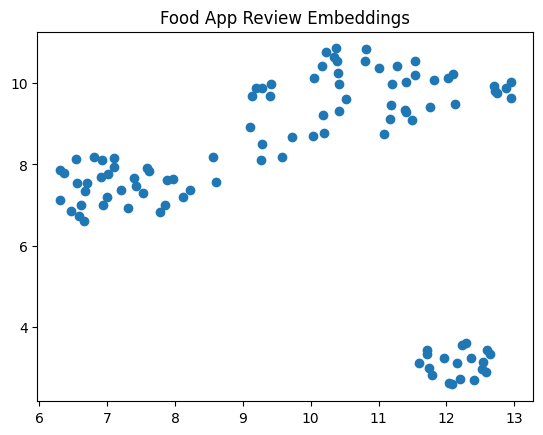

In [ ]:
# Plot the embeddings

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title('Food App Review Embeddings')
plt.show()

## 4. <font color='red'> Cluster and Visualise the Embeddings with Plotly </font>

<p align="justify"> Let's now try and interpret the embedding space. We will first cluster the data points to check similar sentences. Clustering is a vital technique that groups similar data points together based on their closeness to each other.

#### From Embeddings to Clusters

<p align="justify"> By applying clustering algorithms to our embeddings, we can group together similar embeddings, effectively creating clusters of related data points. This process enables us to uncover meaningful categories or classes within our data and helps us interpret what the clusters actually mean

In [ ]:
# Import the KMeans library

from sklearn.cluster import KMeans

In [ ]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_2d)

In [ ]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [ ]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,0
1,Im pretty sure they had a wall made of recycle...,1
2,Dude Im not even mad they were late. Food arri...,0
3,Chhole bhature yaar! Sunday indulgence crispy ...,2
4,The place had a vibe but I cant quite put my f...,1
...,...,...
96,Food arrived. I had a taste. Pretty standard.,0
97,Food was delivered. I ate. Cant complain.,0
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,2
99,Ugh it was so cozy you wouldnt believe. I mean...,1


In [ ]:
# !pip install plotly

In [ ]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 2D Embeddings',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

fig.show()

## 5. Visualise the Embeddings in 3D

Let's now try to visualise the same embeddings in 3D. The process is almost exactly the same. This time, we will use the UMAP function to reduce the dimension to 3 instead of 2.

In [ ]:
# Reduce dimensionality to 3 dimensions with UMAP

reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings)

In [ ]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)

In [ ]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [ ]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,0
1,Im pretty sure they had a wall made of recycle...,1
2,Dude Im not even mad they were late. Food arri...,0
3,Chhole bhature yaar! Sunday indulgence crispy ...,2
4,The place had a vibe but I cant quite put my f...,1
...,...,...
96,Food arrived. I had a taste. Pretty standard.,0
97,Food was delivered. I ate. Cant complain.,0
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,2
99,Ugh it was so cozy you wouldnt believe. I mean...,1


In [ ]:
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 3D Embeddings',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

fig.show()

# Modification/Additions to the Notebook

## 1.1 <font color='red'> Overview of Large Language Models (LLMs) </font>

Large Language Models (LLMs) like GPT-3, BERT, and RoBERTa have significantly advanced natural language understanding by training on massive amounts of data. These models use the Transformer architecture, which enables them to understand context, semantics, and relationships between words.

Sentence Transformers are built on top of these LLMs, allowing us to generate meaningful sentence-level embeddings. These embeddings are especially useful for tasks such as semantic search, clustering, and topic modeling, where the goal is to capture the semantic similarity between different pieces of text.

The `all-MiniLM-L6-v2` model used in this notebook is a lighter and faster variant derived from these larger models, optimized for tasks where efficiency is critical.


### Why Use LLM-Based Embeddings?

Unlike traditional embeddings like Word2Vec or GloVe, which provide static word representations, LLM-based embeddings are dynamic and context-sensitive. This means that the same word can have different embeddings depending on its context in a sentence, making them much more effective for capturing the meaning and nuances of language. This contextual nature makes LLM embeddings ideal for tasks like clustering, where understanding subtle differences in meaning is crucial.



## 2.1 <font color='red'> Model Selection Discussion </font>

In this notebook, we use the `all-MiniLM-L6-v2` model from the Sentence Transformers library. However, it's important to understand that there are a variety of models available that can be used depending on your specific requirements. Here is a brief overview of factors to consider when choosing a Sentence Transformer model:

- **Model Size**: Larger models like `paraphrase-MiniLM-L12-v2` are more accurate but slower.
- **Speed**: Smaller models like `all-MiniLM-L6-v2` are faster and often suitable for many applications where speed is critical.
- **Task-Specific Models**: Some models are fine-tuned for specific tasks such as paraphrasing or semantic search. It is advisable to explore the [Sentence Transformers collection on Hugging Face](https://huggingface.co/sentence-transformers) to choose the model that best fits your needs.


While using Sentence Transformers like `all-MiniLM-L6-v2`, it's important to consider the trade-offs between different models:

- **BERT vs. GPT**: BERT-based models (like `paraphrase-MiniLM-L12-v2`) are designed for encoding the meaning of sentences, making them particularly effective for tasks requiring high-quality embeddings for classification or clustering. GPT-based models, on the other hand, are better suited for generative tasks like text completion.
- **Model Size vs. Accuracy**: Larger models, such as RoBERTa or full-scale BERT, provide better accuracy but come with increased computational cost. The `all-MiniLM-L6-v2` is a compromise between efficiency and accuracy, making it ideal for tasks where computational resources are limited.




## 2.2 <font color='red'> Model Comparison with Different Sentence Transformer Models </font>

In this section, we compare embeddings generated using different Sentence Transformer models. This comparison will help us understand the impact of model selection on downstream clustering and visualization tasks.


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



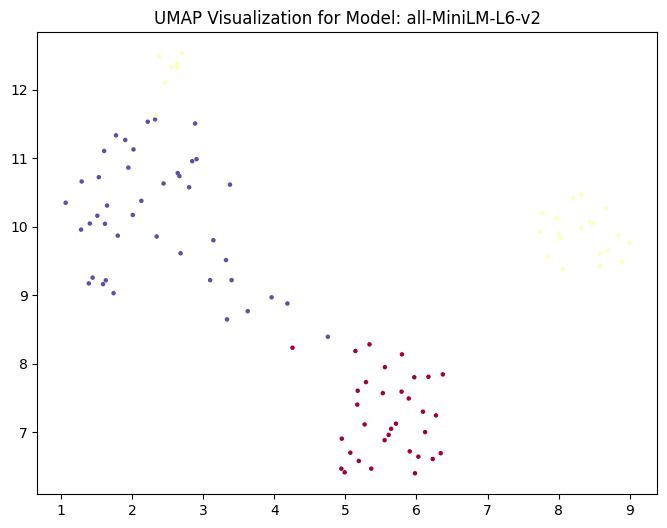

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



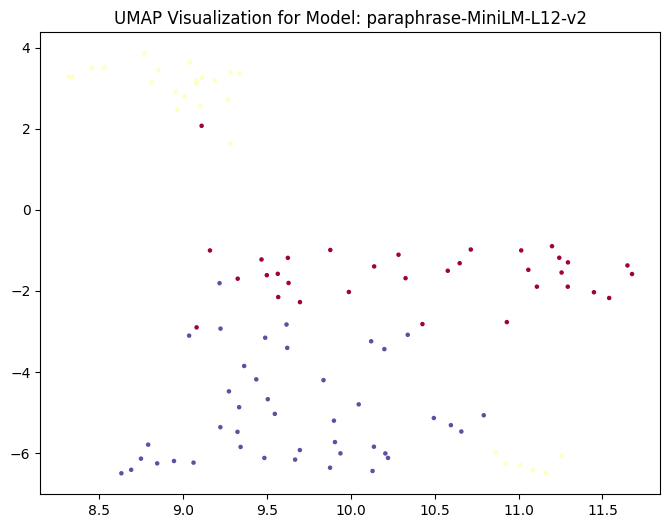

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



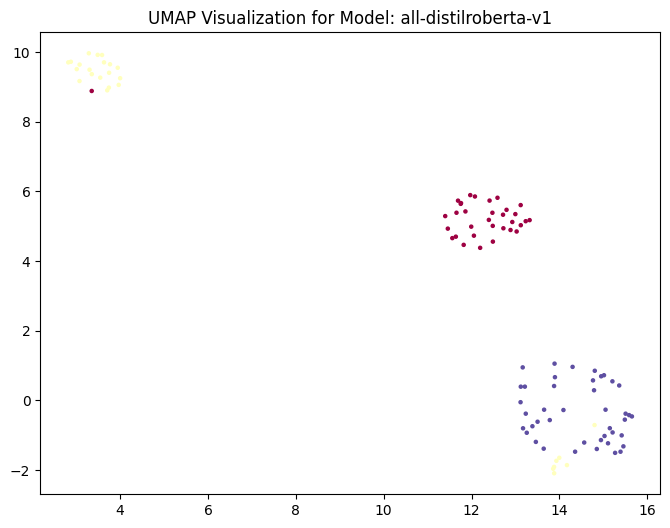

In [ ]:
from sentence_transformers import SentenceTransformer

# List of models to compare
models = ['all-MiniLM-L6-v2', 'paraphrase-MiniLM-L12-v2', 'all-distilroberta-v1']

# Generate embeddings for each model and compare
model_embeddings = {}
for model_name in models:
    model = SentenceTransformer(model_name)
    model_embeddings[model_name] = model.encode(reviews, show_progress_bar=True)

    # Using UMAP to visualize embeddings
    umap_instance = UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embeddings_umap = umap_instance.fit_transform(model_embeddings[model_name])

    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cluster_labels, cmap='Spectral', s=5)
    plt.title(f"UMAP Visualization for Model: {model_name}")
    plt.show()



## 3.1 <font color='red'> Exploring UMAP Parameters </font>

UMAP is a powerful tool for dimensionality reduction. In this notebook, we initially used the default parameters (`n_neighbors=15`, `min_dist=0.1`). However, these parameters can significantly impact the resulting visualization and clustering. Below, we explore how different values of `n_neighbors` and `min_dist` affect the results.

- **n_neighbors**: This parameter controls the balance between local and global structure in the data. Smaller values will emphasize local neighborhoods, while larger values will result in capturing more of the global structure.
- **min_dist**: This controls how tightly UMAP packs the points in the low-dimensional space. Smaller values create more compact clusters.

Let's experiment with a few different values.


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



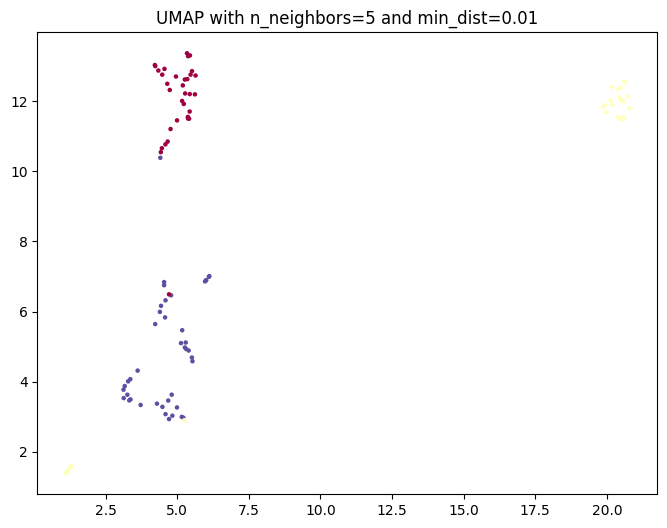

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



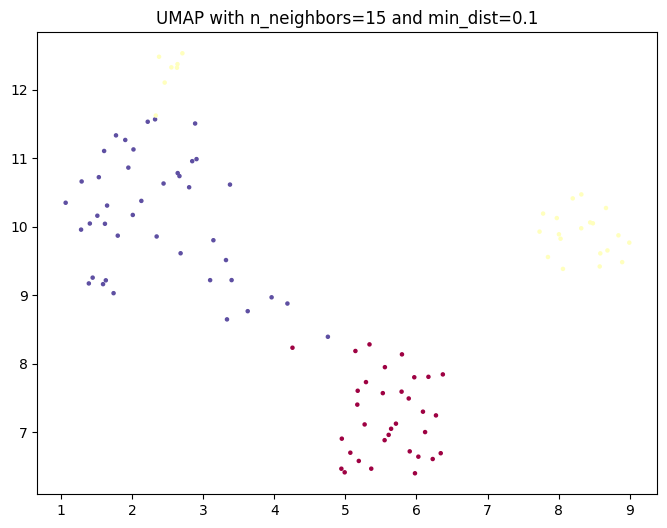

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



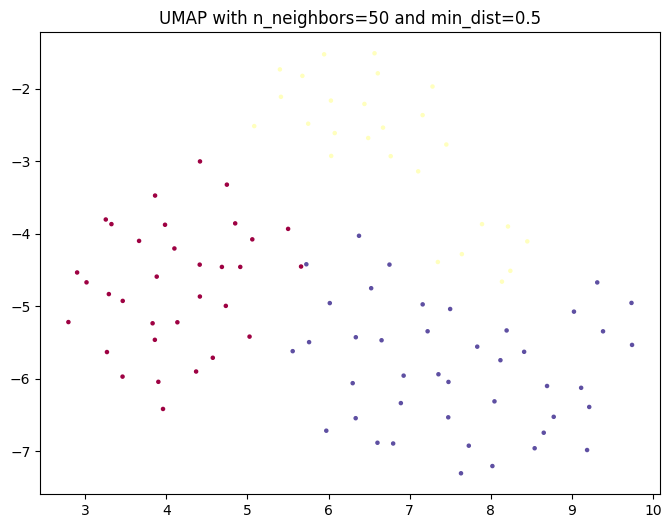

In [ ]:
from umap import UMAP

# Exploring different UMAP parameter settings
umap_variants = [
    {'n_neighbors': 5, 'min_dist': 0.01},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 50, 'min_dist': 0.5},
]

for params in umap_variants:
    umap_instance = UMAP(n_neighbors=params['n_neighbors'], min_dist=params['min_dist'], random_state=42)
    embeddings_umap = umap_instance.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cluster_labels, cmap='Spectral', s=5)
    plt.title(f"UMAP with n_neighbors={params['n_neighbors']} and min_dist={params['min_dist']}")
    plt.show()



## 4.1 <font color='red'> Cluster Analysis and Interpretation </font>

To gain insights into the clusters obtained after UMAP and KMeans clustering, we can analyze the characteristics of each cluster. This section helps in identifying themes or topics represented by each cluster. Here we will examine the most frequent words within each cluster.

### Analyzing Cluster Characteristics


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Analyzing the most common words in each cluster
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(reviews)  # Assuming 'sentences' contains the original text data

for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = [reviews[i] for i in cluster_indices]
    cluster_counts = Counter(" ".join(cluster_texts).split())

    print(f"Cluster {cluster_id}:")
    print(cluster_counts.most_common(10))
    print("-" * 50)


Cluster 0:
[('I', 17), ('a', 15), ('was', 10), ('Food', 10), ('the', 8), ('they', 6), ('like', 6), ('Not', 6), ('but', 5), ('food', 5)]
--------------------------------------------------
Cluster 1:
[('like', 22), ('was', 21), ('a', 15), ('it', 12), ('I', 10), ('were', 9), ('the', 8), ('in', 7), ('Biryani', 6), ('they', 5)]
--------------------------------------------------
Cluster 2:
[('was', 15), ('like', 9), ('food', 9), ('a', 7), ('Needed', 6), ('more', 6), ('Paneer', 6), ('masala', 5), ('vibes', 5), ('dude.', 5)]
--------------------------------------------------



## 4.2 <font color='red'> Topic Modeling for Cluster Themes </font>

To further understand the clusters, we can apply topic modeling techniques like Latent Dirichlet Allocation (LDA) to identify key topics within each cluster.


In [ ]:

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TF-IDF vectorizer for topic modeling
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Applying LDA to each cluster to identify topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)

for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = [reviews[i] for i in cluster_indices]

    if len(cluster_texts) > 0:
        tfidf_cluster = tfidf_vectorizer.transform(cluster_texts)
        lda.fit(tfidf_cluster)

        print(f"Topics for Cluster {cluster_id}:")
        for idx, topic in enumerate(lda.components_):
            print(f"Topic {idx}: ", [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
        print("-" * 50)


Topics for Cluster 0:
Topic 0:  ['slow', 'mo', 'ive', 'year', 'chillin']
Topic 1:  ['snack', 'faster', 'grub', 'delivery', 'ate']
Topic 2:  ['time', 'delivery', 'ordered', 'ate', 'food']
Topic 3:  ['binged', 'late', 'long', 'point', 'food']
Topic 4:  ['arrived', 'received', 'got', 'ate', 'order']
--------------------------------------------------
Topics for Cluster 1:
Topic 0:  ['vada', 'feels', 'man', 'okay', 'like']
Topic 1:  ['90s', 'stepping', 'future', 'like', 'im']
Topic 2:  ['hipster', 'unicorn', 'like', 'place', 'disco']
Topic 3:  ['fancy', 'place', 'walked', 'thought', 'clue']
Topic 4:  ['dancing', 'lighting', 'spices', 'biryani', 'like']
--------------------------------------------------
Topics for Cluster 2:
Topic 0:  ['nirvana', 'spicy', 'like', 'mouth', 'party']
Topic 1:  ['rolls', 'masala', 'sushi', 'pasta', 'chicken']
Topic 2:  ['boss', 'noodles', 'pizza', 'desi', 'bro']
Topic 3:  ['paneer', 'yaar', 'tikka', 'samosas', 'rolls']
Topic 4:  ['spicy', 'dude', 'vibes', 'panee

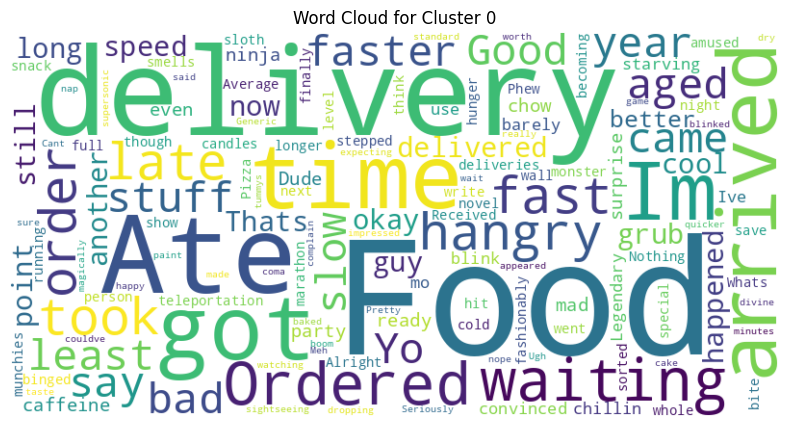

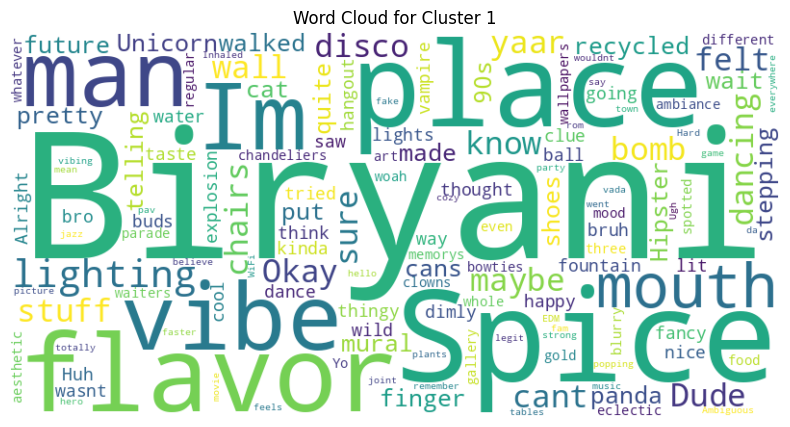

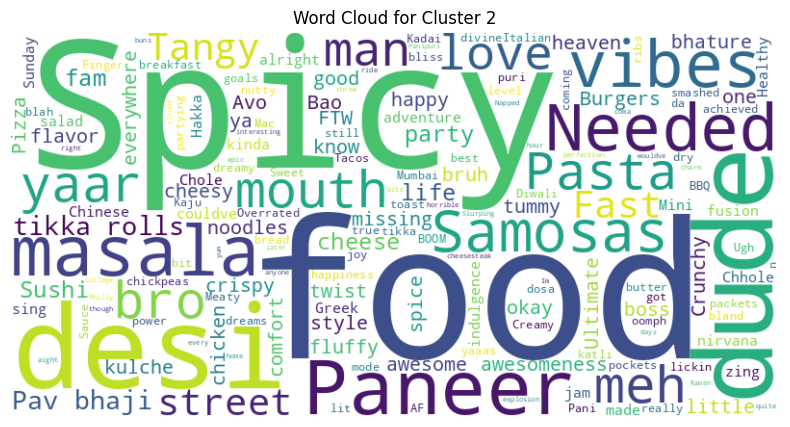

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for topics in each cluster
for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_texts = " ".join([reviews[i] for i in cluster_indices])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()


## 4.2 <font color='red'> Real-World Applications of LLM-Based Clustering and Topic Modeling </font>

By leveraging embeddings generated by LLMs, we can effectively cluster text documents based on their semantic content. Here are some real-world applications of these techniques:

- **Semantic Search**: Clustering documents and analyzing their topics helps in building efficient search engines that understand user intent better. For instance, similar queries can be clustered together to provide more relevant search results.
- **Chatbot Optimization**: Topic modeling can help group user inquiries into common themes, allowing chatbots to respond more intelligently based on frequently asked questions.
- **Document Organization**: LLM-based embeddings can be used to automatically organize large datasets of documents by clustering them into meaningful categories, making it easier to navigate and retrieve information.



## 5.1 <font color='red'> Evaluation Metrics for Clustering </font>

Visualizations provide a good qualitative understanding of clustering results, but it's essential to include quantitative metrics as well. Here, we introduce a few common metrics:

- **Silhouette Score**: This measures how similar an object is to its own cluster compared to others. A higher silhouette score indicates better-defined clusters.
- **Davies-Bouldin Index**: This measures the average ratio of intra-cluster distances to inter-cluster distances. Lower values indicate better clustering.

### Calculating Silhouette Score and Davies-Bouldin Index


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")


Silhouette Score: 0.081
Davies-Bouldin Index: 3.027
